# Shiller's CAPE

http://www.econ.yale.edu/~shiller/data.htm

In [106]:
import numpy as np
import pandas as pd

In [107]:
shiller = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls',
                        sheet_name='Data', skiprows=range(7),
                        skipfooter=1, usecols='A:E',
                        dtype={'Date':str})

In [108]:
shiller

,Date,P,D,E,CPI
0,1871.01,4.440000,0.260000,0.40,12.464061
1,1871.02,4.500000,0.260000,0.40,12.844641
2,1871.03,4.610000,0.260000,0.40,13.034972
3,1871.04,4.740000,0.260000,0.40,12.559226
4,1871.05,4.860000,0.260000,0.40,12.273812
...,...,...,...,...,...
1804,2021.05,4167.849500,57.787824,148.56,269.195000
1805,2021.06,4238.489545,57.865042,158.74,271.696000
1806,2021.07,4363.712857,NaN,NaN,273.003000
1807,2021.08,4454.206364,NaN,NaN,273.656500


In [109]:
shiller.iloc[9]

Date       1871.1
P            4.59
D            0.26
E             0.4
CPI     12.368896
Name: 9, dtype: object

In [110]:
shiller.iloc[-1]

Date      2021.09
P         4493.28
D             NaN
E             NaN
CPI     273.98325
Name: 1808, dtype: object

In [111]:
pd.date_range(start='1871-01-31', periods=len(shiller), freq='M')

DatetimeIndex(['1871-01-31', '1871-02-28', '1871-03-31', '1871-04-30',
               '1871-05-31', '1871-06-30', '1871-07-31', '1871-08-31',
               '1871-09-30', '1871-10-31',
               ...
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30'],
              dtype='datetime64[ns]', length=1809, freq='M')

Frequency codes are [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

In [112]:
shiller['Date'] = pd.date_range(start='1871-01-31',
                                periods=len(shiller),
                                freq='M')

shiller = shiller.set_index('Date')

In [113]:
shiller.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809 entries, 1871-01-31 to 2021-09-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       1809 non-null   float64
 1   D       1806 non-null   float64
 2   E       1806 non-null   float64
 3   CPI     1809 non-null   float64
dtypes: float64(4)
memory usage: 70.7 KB


In [114]:
shiller

,P,D,E,CPI
Date,,,,
1871-01-31,4.440000,0.260000,0.40,12.464061
1871-02-28,4.500000,0.260000,0.40,12.844641
1871-03-31,4.610000,0.260000,0.40,13.034972
1871-04-30,4.740000,0.260000,0.40,12.559226
1871-05-31,4.860000,0.260000,0.40,12.273812
...,...,...,...,...
2021-05-31,4167.849500,57.787824,148.56,269.195000
2021-06-30,4238.489545,57.865042,158.74,271.696000
2021-07-31,4363.712857,NaN,NaN,273.003000


In [115]:
shiller.loc['1995-01-31']

P      465.25
D       13.18
E       31.25
CPI    150.30
Name: 1995-01-31 00:00:00, dtype: float64

When the index is a `datetime`, we can refer to ranges of dates in a meaningful way.

In [116]:
shiller.loc['1995']

,P,D,E,CPI
Date,,,,
1995-01-31,465.25,13.1800,31.2500,150.3
1995-02-28,481.92,13.1800,31.9000,150.9
1995-03-31,493.15,13.1700,32.5500,151.4
1995-04-30,507.91,13.2433,33.1767,151.9
1995-05-31,523.81,13.3067,33.8033,152.2
1995-06-30,539.35,13.3600,34.4300,152.5
1995-07-31,557.37,13.4400,34.6800,152.5
1995-08-31,559.11,13.5100,34.9300,152.9
1995-09-30,578.77,13.5800,35.1800,153.2


In [117]:
shiller.loc['1995-07':'1995-11']

,P,D,E,CPI
Date,,,,
1995-07-31,557.37,13.44,34.6800,152.5
1995-08-31,559.11,13.51,34.9300,152.9
1995-09-30,578.77,13.58,35.1800,153.2
1995-10-31,582.92,13.65,34.7733,153.7
1995-11-30,595.53,13.72,34.3667,153.6


To convert all the data to "real" terms, we need to adjust for inflation. We do this by calculating how much the CPI has changed from each year until the last year in the sample. (Shiller uses the non-seasonally adjusted [CPI data](https://fred.stlouisfed.org/series/CPIAUCNS), which starts in 1913, along with another price series that goes earlier.)

In [118]:
shiller['CPI'].iloc[-1]

273.98325

In [119]:
shiller['CPI'].loc['1995'] / shiller['CPI'].iloc[-1]

Date
1995-01-31    0.548574
1995-02-28    0.550764
1995-03-31    0.552589
1995-04-30    0.554413
1995-05-31    0.555508
1995-06-30    0.556603
1995-07-31    0.556603
1995-08-31    0.558063
1995-09-30    0.559158
1995-10-31    0.560983
1995-11-30    0.560618
1995-12-31    0.560253
Name: CPI, dtype: float64

In [120]:
# CPI numbers at end of series are estimates so use an older one
shiller['CPI_factor'] = shiller['CPI'] / shiller['CPI'].iloc[-3]

In [121]:
shiller.head()

,P,D,E,CPI,CPI_factor
Date,,,,,
1871-01-31,4.44,0.26,0.4,12.464061,0.045655
1871-02-28,4.50,0.26,0.4,12.844641,0.047049
1871-03-31,4.61,0.26,0.4,13.034972,0.047747
1871-04-30,4.74,0.26,0.4,12.559226,0.046004
1871-05-31,4.86,0.26,0.4,12.273812,0.044959


In [122]:
shiller.tail()

,P,D,E,CPI,CPI_factor
Date,,,,,
2021-05-31,4167.849500,57.787824,148.56,269.19500,0.986051
2021-06-30,4238.489545,57.865042,158.74,271.69600,0.995213
2021-07-31,4363.712857,NaN,NaN,273.00300,1.000000
2021-08-31,4454.206364,NaN,NaN,273.65650,1.002394
2021-09-30,4493.280000,NaN,NaN,273.98325,1.003591


In [123]:
shiller.loc['1953']

,P,D,E,CPI,CPI_factor
Date,,,,,
1953-01-31,26.18,1.41000,2.41000,26.6,0.097435
1953-02-28,25.86,1.41000,2.42000,26.5,0.097069
1953-03-31,25.99,1.41000,2.43000,26.6,0.097435
1953-04-30,24.71,1.41333,2.45667,26.6,0.097435
1953-05-31,24.84,1.41667,2.48333,26.7,0.097801
1953-06-30,23.95,1.42000,2.51000,26.8,0.098167
1953-07-31,24.29,1.42000,2.52333,26.8,0.098167
1953-08-31,24.39,1.42000,2.53667,26.9,0.098534
1953-09-30,23.27,1.42000,2.55000,26.9,0.098534


In [124]:
shiller['p_real'] = shiller['P'] / shiller['CPI_factor']
shiller['d_real'] = shiller['D'] / shiller['CPI_factor']
shiller['e_real'] = shiller['E'] / shiller['CPI_factor']

In [125]:
shiller.head()

,P,D,E,CPI,CPI_factor,p_real,d_real,e_real
Date,,,,,,,,
1871-01-31,4.44,0.26,0.4,12.464061,0.045655,97.250271,5.694836,8.761286
1871-02-28,4.50,0.26,0.4,12.844641,0.047049,95.644049,5.526101,8.501693
1871-03-31,4.61,0.26,0.4,13.034972,0.047747,96.551327,5.445411,8.377555
1871-04-30,4.74,0.26,0.4,12.559226,0.046004,103.034548,5.651684,8.694899
1871-05-31,4.86,0.26,0.4,12.273812,0.044959,108.099637,5.783108,8.897089


In [126]:
shiller = shiller.drop(columns=['P', 'D', 'E', 'CPI', 'CPI_factor'])

In [127]:
shiller.tail(15)

,p_real,d_real,e_real
Date,,,
2020-07-31,3379.723099,62.590604,104.199431
2020-08-31,3562.458180,62.103269,103.518285
2020-09-30,3530.029762,61.726704,103.021187
2020-10-31,3584.326960,61.501494,101.549075
2020-11-30,3723.203792,61.339341,100.180866
2020-12-31,3873.057257,61.082104,98.657725
2021-01-31,3959.388261,60.598827,110.092348
2021-02-28,4030.920845,60.045568,121.280922
2021-03-31,4030.476360,59.401487,132.132970


Next we'll calculate the *cyclically-adjusted price earnings ratio (CAPE)*. This is the price at a point in time divided by the average earnings over the previous ten years.

In [128]:
r = shiller.rolling(window=120, min_periods=100)

In [129]:
r

Rolling [window=120,min_periods=100,center=False,axis=0,method=single]

In [130]:
r['e_real'].mean()

Date
1871-01-31           NaN
1871-02-28           NaN
1871-03-31           NaN
1871-04-30           NaN
1871-05-31           NaN
                 ...    
2021-05-31    116.057410
2021-06-30    116.541292
2021-07-31    116.658439
2021-08-31    116.769376
2021-09-30    116.872890
Name: e_real, Length: 1809, dtype: float64

In [131]:
r['e_real'].mean().iloc[95:105]

Date
1878-12-31         NaN
1879-01-31         NaN
1879-02-28         NaN
1879-03-31         NaN
1879-04-30    9.229380
1879-05-31    9.250051
1879-06-30    9.273541
1879-07-31    9.297140
1879-08-31    9.322177
1879-09-30    9.344698
Name: e_real, dtype: float64

The value of CAPE is the current price value divided by the rolling average *lagged one period*. We do this by calling `.shift` to shift the time series one period.

In [132]:
shiller['CAPE'] = shiller['p_real'] / r['e_real'].mean().shift()

shiller.tail()

,p_real,d_real,e_real,CAPE
Date,,,,
2021-05-31,4226.807396,58.605283,150.661512,36.552152
2021-06-30,4258.878899,58.143403,159.503623,36.696312
2021-07-31,4363.712857,NaN,NaN,37.443491
2021-08-31,4443.569584,NaN,NaN,38.090426
2021-09-30,4477.204062,NaN,NaN,38.342280


Then, we'll add a recession indicator variable (1 or 0) by accessing data from the St. Louis Federal Reserve data service, [FRED](https://fred.stlouisfed.org/) using the `pandas_datareader`.

The particular series we want is at https://fred.stlouisfed.org/series/USREC.

In [133]:
import pandas_datareader as pdr

In [134]:
nber = pdr.get_data_fred('USREC', '1870')
nber.head()

,USREC
DATE,
1870-01-01,1
1870-02-01,1
1870-03-01,1
1870-04-01,1
1870-05-01,1


In [135]:
nber.mean()

USREC    0.281953
dtype: float64

The `shiller` DataFrame and the `nber` Series both have the same index (`datetime` values). We can *join* the two together on that index.

In [136]:
nber.index

DatetimeIndex(['1870-01-01', '1870-02-01', '1870-03-01', '1870-04-01',
               '1870-05-01', '1870-06-01', '1870-07-01', '1870-08-01',
               '1870-09-01', '1870-10-01',
               ...
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', name='DATE', length=1823, freq=None)

In [137]:
from pandas.tseries.offsets import MonthEnd

In [138]:
nber.index + MonthEnd(0)

DatetimeIndex(['1870-01-31', '1870-02-28', '1870-03-31', '1870-04-30',
               '1870-05-31', '1870-06-30', '1870-07-31', '1870-08-31',
               '1870-09-30', '1870-10-31',
               ...
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', name='DATE', length=1823, freq=None)

In [139]:
nber.index = nber.index + MonthEnd(0)

In [141]:
shiller = shiller.join(nber).dropna()

shiller.head()

,p_real,d_real,e_real,CAPE,USREC
Date,,,,,
1879-05-31,131.454931,6.282478,11.317135,14.243094,0
1879-06-30,133.676385,6.413766,11.646049,14.451421,0
1879-07-31,134.791351,6.395916,11.704160,14.535046,0
1879-08-31,135.792276,6.449299,11.901009,14.605812,0
1879-09-30,136.051291,6.286730,11.686870,14.594369,0


## Plotting

(This is more advanced. Don't worry about learning these details yet.)

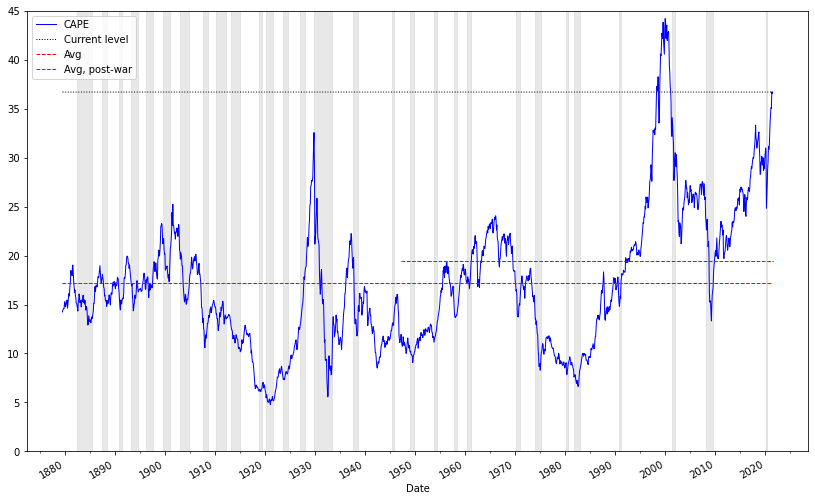

In [142]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# create Series with means and current value repeated
avg = pd.Series(shiller['CAPE'].mean(), index=shiller.index)
avg47 = pd.Series(shiller.loc['1947':,'CAPE'].mean(), index=shiller.loc['1947':].index)
curentval = pd.Series(shiller['CAPE'].iloc[-1], index=shiller.index)

# main plot
ax = shiller['CAPE'].plot(figsize=(14,9), ylim=(0,45), legend=True, x_compat=True, c='b', lw=1)

# change year locations
yrs10 = YearLocator(10)
yrs5 = YearLocator(5)
ax.xaxis.set_major_locator(yrs10)
ax.xaxis.set_minor_locator(yrs5)

# add bells & whistles
curentval.plot(ax=ax, label='Current level', legend=True, c='k', ls=':', lw=1)
avg.plot(ax=ax, label='Avg', legend=True, c='r', ls='--', lw=1)
avg47.plot(ax=ax, label='Avg, post-war', legend=True, c='g', ls='--', lw=1)
plt.legend(loc='upper left', fontsize='medium')

ax.fill_between(shiller['CAPE'].index, 0, 45, where=shiller['USREC']==1, 
                facecolor='lightgrey', edgecolor='lightgrey', alpha=0.5)

In [ ]:
shiller.iloc[-1]

In [ ]:
shiller['e_real'].plot()
r['e_real'].mean().plot()

## Correlations

Let's calculate future 2- and 5-year returns. We do this by dividing the price in 2 or 5 years by the price "today".

In [ ]:
shiller['p_real'].pct_change(1)

# equivalent to:
shiller['p_real'] / shiller['p_real'].shift() - 1

In [ ]:
shiller['p_real'].shift(-1) / shiller['p_real'] - 1

Ret(t -> t+24) = price(t+24) / price(t) - 1

In [ ]:
shiller['ret2yr'] = shiller['p_real'].shift(-2*12) / shiller['p_real'] - 1
shiller['ret5yr'] = shiller['p_real'].shift(-5*12) / shiller['p_real'] - 1

In [ ]:
shiller

In [ ]:
# this is WRONG
shiller['p_real'].pct_change(-24)

# p(t) / p(t+24) - 1

In [ ]:
shiller

In [ ]:
shiller[['CAPE', 'ret2yr', 'ret5yr']].corr()

In [ ]:
shiller[['CAPE', 'ret5yr']].plot()

In [ ]:
shiller['CAPE'].mean()

In [ ]:
shiller.loc['1980':, ['CAPE', 'ret2yr', 'ret5yr']].corr()